In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.rcParams["font.family"] = "Arial"
plt.rcParams['legend.title_fontsize'] = 7
plt.rcParams["text.usetex"] = True

SAVE = True

base_dir = os.path.abspath("..")
results_dir = os.path.join(base_dir, "..", "results")
figures_dir = os.path.join(base_dir, "..", "figures")

gen_refs = pd.read_csv(os.path.join(results_dir, f"merged_gen_refs_vanilla_gpt-4_unique.csv"))
intro_refs = pd.read_csv(os.path.join(results_dir, f"merged_intro_refs_vanilla_gpt-4_unique.csv"))

# Only use references that correspond to existing generated
mask = gen_refs["Exists"] == 1.0
intro_refs = intro_refs[mask]
gen_refs = gen_refs[mask]

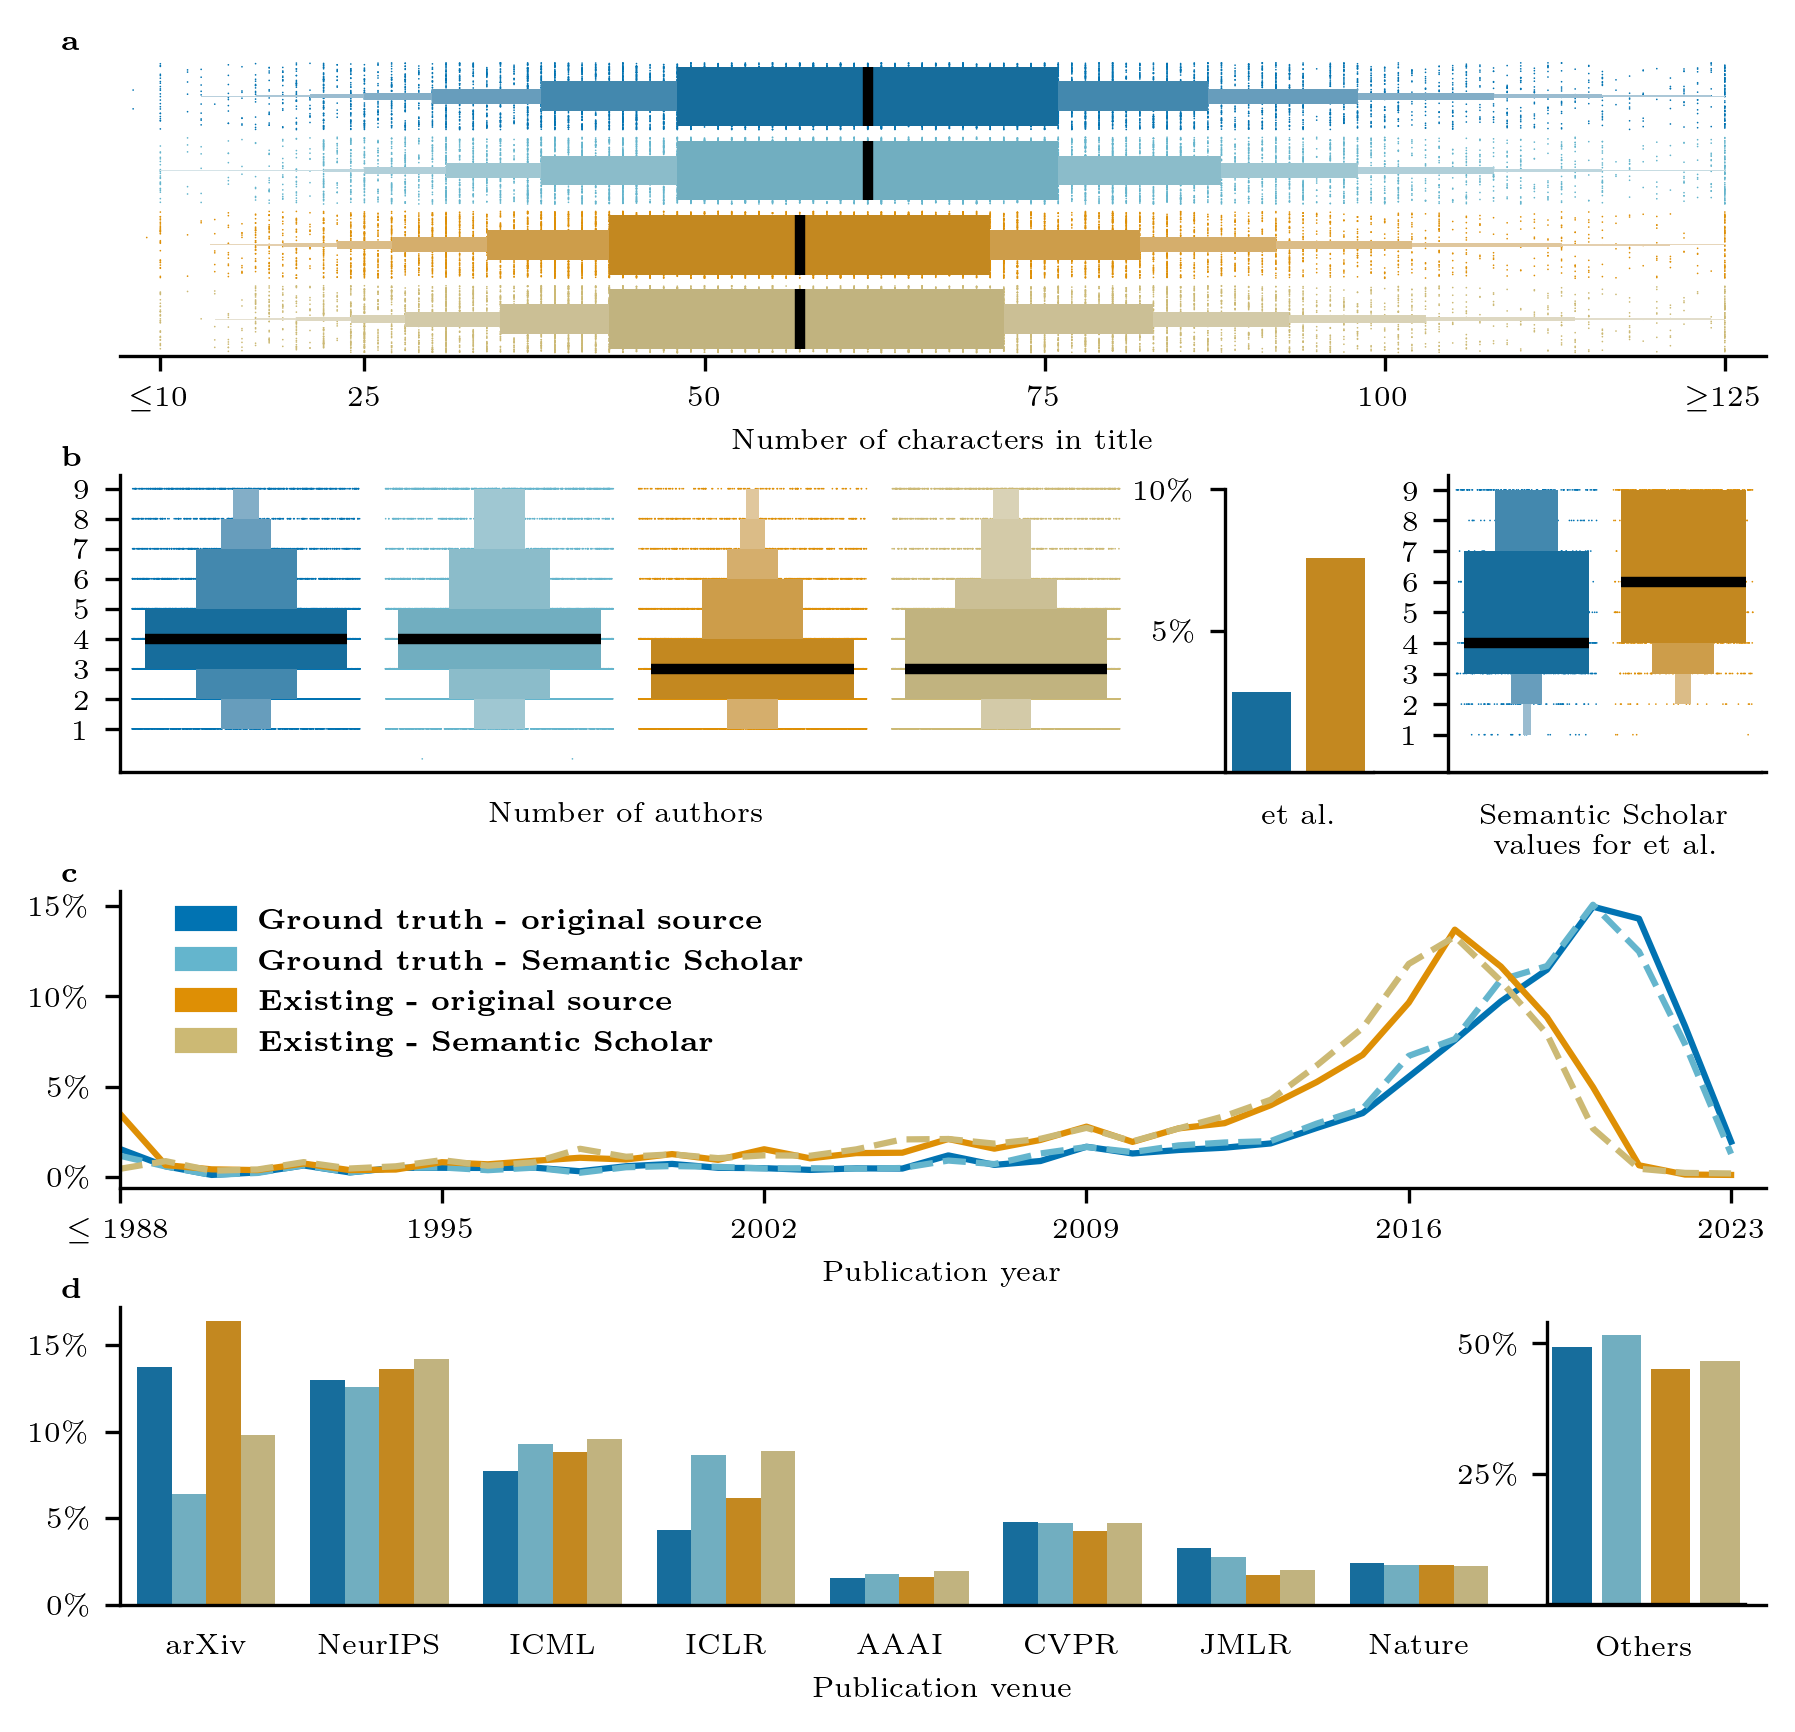

In [2]:
# Extended Data Figure 2
Figure1, ax1 = plt.subplot_mosaic(
    [["A"], ["B"], ["C"], ["D"]],
    figsize=(7.08,6.69),
    dpi=300,
    gridspec_kw={'wspace': 0, 'hspace': 0.4}
)

# Plot 1: Character length
existing_text = gen_refs["Title Length"].to_frame()
existing_text["Category"] = "existing_text"
intro_text = intro_refs["Title Length"].to_frame()
intro_text["Category"] = "intro_text"
existing_sch = gen_refs["Title Length_sch"].to_frame()
existing_sch.columns = ["Title Length"]
existing_sch["Category"] = "existing_sch"
intro_sch = intro_refs["Title Length_sch"].to_frame()
intro_sch.columns = ["Title Length"]
intro_sch["Category"] = "intro_sch"

df_chars = pd.concat(
    [intro_text, intro_sch, existing_text, existing_sch],
    ignore_index=True
)

df_chars.loc[df_chars["Title Length"] > 125, "Title Length"] = 125

sns.stripplot(
    data=df_chars,
    x="Title Length",
    y="Category",
    ax=ax1["A"],
    palette=['#0173b2', '#64b5cd', '#de8f05', '#ccb974'],
    order=["intro_text", "intro_sch", "existing_text", "existing_sch"],
    hue="Category",
    size=0.4,
    jitter=0.45,
    zorder=0,
)

sns.boxenplot(
    data=df_chars,
    x="Title Length",
    y="Category",
    ax=ax1["A"],
    palette=['#0173b2', '#64b5cd', '#de8f05', '#ccb974'],
    order=["intro_text", "intro_sch", "existing_text", "existing_sch"],
    edgecolor=None,
    linecolor='black',
    linewidth=2,
    showfliers=False,
    hue="Category",
)

ax1["A"].set(xlim=(7,128))
ax1["A"].set_xlabel("Number of characters in title", fontsize=7)
ax1["A"].set_ylabel("")
ax1["A"].set_xticks(ticks=[10,25,50,75,100,125], labels=[r"$\leq$10","25","50","75","100",r"$\geq$125"], fontsize=7)
ax1["A"].set_yticks("")
ax1["A"].set_title("")
sns.despine(ax=ax1["A"],left=True, bottom=False)

# Plot 2: Number of authors
existing_text = gen_refs["Number of Authors"].to_frame()
existing_text["Category"] = "existing_text"
intro_text = intro_refs["Number of Authors"].to_frame()
intro_text["Category"] = "intro_text"
existing_sch = gen_refs["Number Authors_sch"].to_frame()
existing_sch.columns = ["Number of Authors"]
existing_sch["Category"] = "existing_sch"
intro_sch = intro_refs["Number Authors_sch"].to_frame()
intro_sch.columns = ["Number of Authors"]
intro_sch["Category"] = "intro_sch"

df_authors = pd.concat(
    [intro_text, intro_sch, existing_text, existing_sch],
    ignore_index=True
)

etal_mask = df_authors["Number of Authors"] == "et al."
etal = df_authors[etal_mask]

etal_authors = etal.groupby("Category").size() / df_authors.groupby("Category").size()
etal_authors.dropna(inplace=True)

df_authors = df_authors[~etal_mask]

df_authors["Number of Authors"] = df_authors["Number of Authors"].astype(float)
df_authors.loc[df_authors["Number of Authors"] >= 9, "Number of Authors"] = 9

sns.stripplot(
    data=df_authors,
    y="Number of Authors",
    x="Category",
    ax=ax1["B"],
    palette=['#0173b2', '#64b5cd', '#de8f05', '#ccb974'],
    order=["intro_text", "intro_sch", "existing_text", "existing_sch"],
    hue="Category",
    size=0.4,
    jitter=0.45,
    zorder=0,
)

sns.boxenplot(
    data=df_authors,
    y="Number of Authors",
    x="Category",
    ax=ax1["B"],
    palette=['#0173b2', '#64b5cd', '#de8f05', '#ccb974'],
    order=["intro_text", "intro_sch", "existing_text", "existing_sch"],
    edgecolor=None,
    linecolor='black',
    linewidth=2,
    showfliers=False,
    hue="Category",
)

ax1["B"].tick_params(bottom=False)

ax1["B"].set(xlim=(-0.5,6))
ax1["B"].set_xlabel("")
ax1["B"].set_ylabel("")
ax1["B"].set_yticks(ticks=[1,2,3,4,5,6,7,8,9], labels=["1","2","3","4","5","6","7","8","9"], fontsize=7)
ax1["B"].set_xticks(ticks=[1.5], labels=["Number of authors"], fontsize="7")
ax1["B"].set_title("")
sns.despine(ax=ax1["B"],left=False, bottom=False)

# side plot with et al.
inset_ax = inset_axes(
    ax1["B"], width="9%", height="95%", loc='lower right',
    bbox_to_anchor=(-0.226, -0.068, 1, 1), bbox_transform=ax1['B'].transAxes
)

sns.barplot(
    x=etal_authors.index.to_list(),
    y=etal_authors.values,
    palette=['#0173b2', '#de8f05'],
    ax=inset_ax,
    order=["intro_text", "existing_text"],
    hue=etal_authors.values,
)

inset_ax.get_legend().set_visible(False)

inset_ax.set_xlabel("et al.", fontsize=7)
inset_ax.set_ylabel("")
inset_ax.set_xticks("")
inset_ax.set_yticks([0.05,0.10], labels=[r"5$\%$",r"10$\%$"], fontsize=7)
inset_ax.set_title("")
sns.despine(ax=inset_ax,left=False, bottom=False)

# side plot with semantic scholar distribution of et al.
existing_text_etal = gen_refs.loc[gen_refs["Number of Authors"] == "et al.", "Number Authors_sch"].to_frame()
existing_text_etal["Category"] = "existing_text_etal"

intro_text_etal = intro_refs.loc[gen_refs["Number of Authors"] == "et al.", "Number Authors_sch"].to_frame()
intro_text_etal["Category"] = "intro_text_etal"

df_authors_etal = pd.concat(
    [intro_text_etal, existing_text_etal],
    ignore_index=True
)

df_authors_etal.loc[df_authors_etal["Number Authors_sch"] >= 9, "Number Authors_sch"] = 9

etal_ax = inset_axes(
    ax1["B"], width="19%", height="100%", loc='lower right',
    bbox_to_anchor=(0.01, -0.068, 1, 1), bbox_transform=ax1['B'].transAxes
)

sns.stripplot(
    data=df_authors_etal,
    y="Number Authors_sch",
    x="Category",
    ax=etal_ax,
    palette=['#0173b2', '#de8f05'],
    order=["intro_text_etal", "existing_text_etal"],
    hue="Category",
    size=0.4,
    jitter=0.45,
    zorder=0,
)

sns.boxenplot(
    data=df_authors_etal,
    y="Number Authors_sch",
    x="Category",
    ax=etal_ax,
    palette=['#0173b2', '#de8f05'],
    order=["intro_text_etal", "existing_text_etal"],
    edgecolor=None,
    linecolor='black',
    linewidth=2,
    showfliers=False,
    hue="Category",
)

etal_ax.set(xlim=(-0.5,1.5))
etal_ax.set(ylim=(-0.21,9.5))
etal_ax.set_xlabel("Semantic Scholar \n values for et al.", fontsize=7)
etal_ax.set_ylabel("")
etal_ax.set_yticks(ticks=[1,2,3,4,5,6,7,8,9], labels=["1","2","3","4","5","6","7","8","9"], fontsize=7)
etal_ax.set_xticks("")
etal_ax.set_title("")
sns.despine(ax=etal_ax,left=False, bottom=False)

# Plot 3: Publication Year
starting_year = 1988
all_years = pd.date_range("1988", periods=36, freq="Y").year

existing_year = gen_refs["Publication Year"].to_frame()
existing_year.loc[existing_year["Publication Year"] <= starting_year, "Publication Year"] = starting_year
existing_year = existing_year["Publication Year"].value_counts().sort_index().reindex(all_years, fill_value=0)

intro_year = intro_refs["Publication Year"].to_frame()
intro_year.loc[intro_year["Publication Year"] <= starting_year, "Publication Year"] = starting_year
intro_year = intro_year["Publication Year"].value_counts().sort_index().reindex(all_years, fill_value=0)

existing_year_sch = gen_refs["Publication Year_sch"].to_frame()
existing_year_sch.loc[existing_year_sch["Publication Year_sch"] <= starting_year, "Publication Year"] = starting_year
existing_year_sch = existing_year_sch["Publication Year_sch"].value_counts().sort_index().reindex(all_years, fill_value=0)

intro_year_sch = intro_refs["Publication Year_sch"].to_frame()
intro_year_sch.loc[intro_year_sch["Publication Year_sch"] <= starting_year, "Publication Year_sch"] = starting_year
intro_year_sch = intro_year_sch["Publication Year_sch"].value_counts().sort_index().reindex(all_years, fill_value=0)

existing_year = existing_year.values / existing_year.sum()
intro_year = intro_year.values / intro_year.sum()
existing_year_sch = existing_year_sch.values / existing_year_sch.sum()
intro_year_sch = intro_year_sch.values / intro_year_sch.sum()

years_data = pd.DataFrame(
    {
        "Year": all_years,
        "intro_text": intro_year,
        "intro_sch": intro_year_sch,
        "existing_text": existing_year,
        "existing_sch": existing_year_sch,
    }
)

sns.lineplot(x='Year', y='intro_text', data=years_data, color='#0173b2', linewidth=1.5, ax=ax1["C"])
sns.lineplot(x='Year', y='intro_sch', data=years_data, color='#64b5cd', linewidth=1.5, linestyle='--', ax=ax1["C"])
sns.lineplot(x='Year', y='existing_text', data=years_data, color='#de8f05', linewidth=1.5, ax=ax1["C"])
sns.lineplot(x='Year', y='existing_sch', data=years_data, color='#ccb974', linewidth=1.5, linestyle='--', ax=ax1["C"])

ax1["C"].set(xlim=(1988,2023.75))
ax1["C"].set_xlabel("Publication year", fontsize=7)
ax1["C"].set_ylabel("")
ax1["C"].set_xticks(ticks=[1988, 1995, 2002, 2009, 2016,2023], labels=[r"$\small \leq 1988$","1995", "2002", "2009", "2016","2023"], fontsize=7)
ax1["C"].set_yticks([0,0.05,0.10,0.15], labels=[r"0$\%$",r"5$\%$",r"10$\%$",r"15$\%$"], fontsize=7)
ax1["C"].set_title("")
sns.despine(ax=ax1["C"],left=False, bottom=False)

# Plot 4: Publication Venue
existing_journals = {"arxiv": None, "NeurIPS": None, "ICML": None, "ICLR": None, "AAAI": None, "CVPR": None, "JMLR": None, "Nature": None}
intro_journals = {"arxiv": None, "NeurIPS": None, "ICML": None, "ICLR": None, "AAAI": None, "CVPR": None, "JMLR": None, "Nature": None}
existing_journals_sch = {"arxiv": None, "NeurIPS": None, "ICML": None, "ICLR": None, "AAAI": None, "CVPR": None, "JMLR": None, "Nature": None}
intro_journals_sch = {"arxiv": None, "NeurIPS": None, "ICML": None, "ICLR": None, "AAAI": None, "CVPR": None, "JMLR": None, "Nature": None}

for journal in existing_journals.keys():
    existing_journals[journal] = gen_refs["Publication Venue_processed"].isin([journal]).sum() / len(gen_refs[gen_refs["Exists"] == 1.0])
    intro_journals[journal] = intro_refs["Publication Venue_processed"].isin([journal]).sum() / len(intro_refs[gen_refs["Exists"] == 1.0])
    existing_journals_sch[journal] = gen_refs["Venue_sch_processed"].isin([journal]).sum() / len(gen_refs[gen_refs["Exists"] == 1.0])
    intro_journals_sch[journal] = intro_refs["Venue_sch_processed"].isin([journal]).sum() / len(intro_refs[gen_refs["Exists"] == 1.0])

df = pd.DataFrame([intro_journals, intro_journals_sch, existing_journals, existing_journals_sch])
df = df.T
df.columns = ["existing_text", "existing_sch", "intro_text", "intro_sch"]
df = df.reset_index()
df = df.rename(columns={'index': 'Journals'})
df_melted = df.melt(id_vars='Journals', var_name='Type', value_name='Value')

sns.barplot(
    x='Journals',
    y='Value',
    hue='Type',
    data=df_melted,
    hue_order=["intro_text", "intro_sch", "existing_text", "existing_sch"],
    palette=['#0173b2', '#64b5cd', '#de8f05', '#ccb974'],
    ax=ax1["D"],
)

ax1["D"].legend().set_visible(False)
ax1["D"].tick_params(bottom=False)

ax1["D"].set(xlim=(-0.5,9))
ax1["D"].set_xlabel("Publication venue", fontsize=7)
ax1["D"].set_ylabel("")
ax1['D'].set_xticks(ticks=[0,1,2,3,4,5,6,7], fontsize=7)
ax1['D'].set_xticklabels(labels=[r"\scriptsize{arXiv}",r"\scriptsize{NeurIPS}", r"\scriptsize{ICML}", r"\scriptsize{ICLR}",
                                 r"\scriptsize{AAAI}",r"\scriptsize{CVPR}",r"\scriptsize{JMLR}",r"\scriptsize{Nature}"], fontsize=7)
ax1["D"].set_yticks([0,0.05,0.10,0.15], labels=[r"0$\%$",r"5$\%$",r"10$\%$",r"15$\%$"], fontsize=7)
ax1["D"].set_title("")
sns.despine(ax=ax1["D"],left=False, bottom=False)

# side plot with others
other_journals = [
    1 - sum(existing_journals.values()),
    1 - sum(existing_journals_sch.values()),
    1 - sum(intro_journals.values()),
    1 - sum(intro_journals_sch.values())
]

others_df = pd.DataFrame([other_journals, ["intro_text", "intro_sch", "existing_text", "existing_sch"]]).T
others_df.columns = ["Value", "Type"]

others_ax = inset_axes(
    ax1["D"], width="12%", height="95%", loc='lower right',
    bbox_to_anchor=(0, -0.068, 1, 1), bbox_transform=ax1['D'].transAxes
)

sns.barplot(
    data=others_df,
    x="Type",
    y="Value",
    palette=['#0173b2', '#64b5cd', '#de8f05', '#ccb974'],
    ax=others_ax,
    order=["intro_text", "intro_sch", "existing_text", "existing_sch"],
    hue="Type",
)

others_ax.set_xlabel("Others", fontsize=7)
others_ax.set_ylabel("")
others_ax.set_xticks("")
others_ax.set_yticks([0.25,0.50], labels=[r"25$\%$",r"50$\%$"], fontsize=7)
others_ax.set_title("")
sns.despine(ax=others_ax,left=False, bottom=False)

# Legend
labels = [r'\textbf{Ground truth - original source}', r'\textbf{Ground truth - Semantic Scholar}', r'\textbf{Existing - original source}', r'\textbf{Existing - Semantic Scholar}']

patch_handle_1 = Patch(color='#0173b2')
patch_handle_2 = Patch(color='#64b5cd')
patch_handle_3 = Patch(color='#de8f05')
patch_handle_4 = Patch(color='#ccb974')

handles = [patch_handle_1, patch_handle_2, patch_handle_3, patch_handle_4]
Figure1.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.46, 0.47),
               frameon=False, bbox_transform=Figure1.transFigure, fontsize=7)

# annotations
annotations = {
    'A': r'\textbf{a}',
    'B': r'\textbf{b}',
    'C': r'\textbf{c}',
    'D': r'\textbf{d}',
}

# Annotate each subplot
for key, ax in ax1.items():
    ax.text(-0.035, 1.10, annotations[key], transform=ax.transAxes, 
            fontsize=7, fontweight='bold', va='top', ha='left')

if SAVE:
    plt.savefig(os.path.join(figures_dir, "Extended_data_fig_2.pdf"), bbox_inches='tight')